# Analysis of the Battles of the World War
<ul>
    <li>by Irina Apkarian</li>
    <li>August 30, 2016</li>
    <li>Description: Сonduct an analysis of attacks, losses and summarizing the outcome of the war</li>
    <li>Dataset: [Battles of the World War](https://github.com/iapkarian/world_war_dataset)</li>
</ul>

In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from ggplot import *

# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

### Loading and quick glance at the data

In [2]:
df = pd.read_csv('world_war.csv')
df.head(10)

,Name,Year,Location,Assaulter,Defender,Assaulter_1,Assaulter_2,Defender_1,Defender_2,As_strength_men,Def_strength_men,As_strength_guns,Def_strength_guns,Assaulter_losses,Defender_losses,Outcome
0,Battle of Mons,1914,"Mons, Belgium",German Empire,British Empire,NaN,NaN,NaN,NaN,160000.0,80000.0,600.0,300.0,5000.0,1638.0,win
1,Battle of Liege,1914,"Liege, Belgium",German Empire,Belgium,NaN,NaN,NaN,NaN,59800.0,36000.0,400.0,280.0,25000.0,15000.0,win
2,Battle of the Frontiers,1914,"Lorraine, the Ardennes and Belgium",Belgium,German Empire,France,British Empire,NaN,NaN,1504000.0,1600000.0,4640.0,5000.0,165000.0,264680.0,loss
3,Togoland Campaign,1914,German Togoland,British Empire,German Empire,France,NaN,NaN,NaN,1100.0,693.0,NaN,NaN,137.0,41.0,win
4,Battle of Cer,1914,Cer Mountain,Austria-Hungary,Serbia,NaN,NaN,NaN,NaN,200000.0,180000.0,NaN,NaN,18500.0,4785.0,loss
5,Battle of Tannenberg,1914,"Allenstein, East Prussia",Russian Empire,German Empire,NaN,NaN,NaN,NaN,230000.0,150000.0,NaN,NaN,170000.0,13873.0,loss
6,First Battle of the Marne,1914,"Marne River, Paris",France,German Empire,British Empire,NaN,NaN,NaN,1071000.0,1485000.0,NaN,NaN,263000.0,256000.0,win
7,Battle of Drina,1914,Drina River,Austria-Hungary,Serbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,loss
8,First Battle of Ypres,1914,"Ypres, Belgium",France,German Empire,Belgium,British Empire,NaN,NaN,4400000.0,5400000.0,NaN,NaN,58155.0,46765.0,indecisive
9,Siege of Tsingtao,1914,"Tsingtau, Germany",British Empire,German Empire,Empire of Japan,NaN,Austria-Hungary,NaN,24500.0,3750.0,142.0,NaN,3000.0,700.0,win


### Which year had the most battles?

In [3]:
# Count the number of observations for each value
df['Year'].value_counts()

1918    27
1916    26
1915    23
1914    16
1917    14
Name: Year, dtype: int64

### What was the outcomes of all battles?

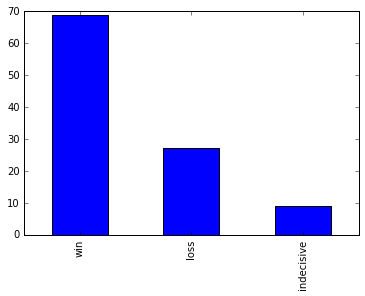

In [4]:
# Count the number of observations for each value, then make a bar plot
df['Outcome'].value_counts().plot(kind='bar')

### Who more than anyone else attacked?

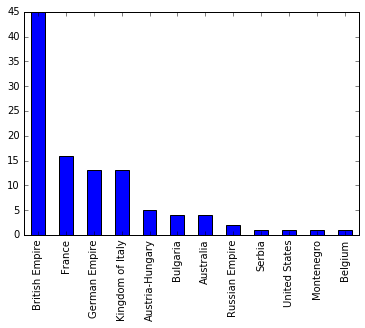

In [5]:
# Count the number of observations for each value, then make a bar plot
df['Assaulter'].value_counts().plot(kind='bar')

### Who was most active in the war?

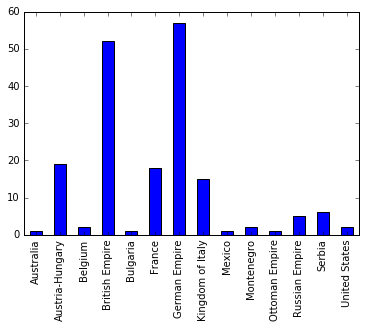

In [6]:
war_action = df['Assaulter'].value_counts() + df['Defender'].value_counts()
war_action.fillna(1).plot(kind='bar')

### Losses during the war

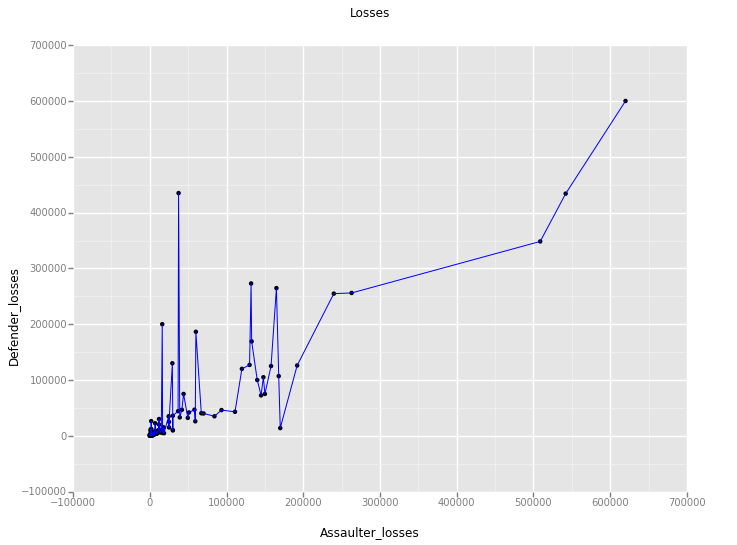

<ggplot: (-9223363273600222299)>

In [7]:
ggplot(df, aes('Assaulter_losses', 'Defender_losses')) +\
        geom_point() + geom_line(color='blue') +\
        ggtitle("Losses")

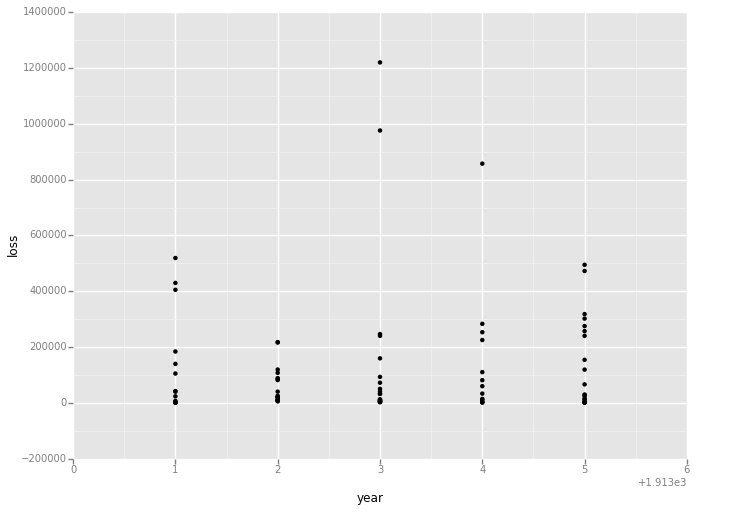

<ggplot: (8763254508797)>

In [8]:
data = {'loss':df['Assaulter_losses'] + df['Defender_losses'],
        'year': df['Year']}
losses = pd.DataFrame(data)
ggplot(losses, aes('year', 'loss')) + geom_point()